# Simple Neural Network with PyTorch

This notebook is used to implement a simple neural network using PyTorch. We will:
1. Create a simple neural network from scratch
2. Make predictions
3. Graph the output
4. Optimize a parameter using backpropagation 

This notebook is based on a tutorial from [StatQuest](https://www.youtube.com/watch?v=FHdlXe1bSe4&list=PLblh5JKOoLUIxGDQs4LFFD--41Vzf-ME1&index=28).

## 1. Library Set Up

Install and import the necessary libraries.

In [ ]:
#!pip install torch 
#!pip install matplotlib 
#!pip install seaborn 

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD 

import matplotlib.pyplot as plt
import seaborn as sns

## 2. Create a Simple Neural Network

Initialize the weights and biases of the neural network based on the sample neural network in the figure below.

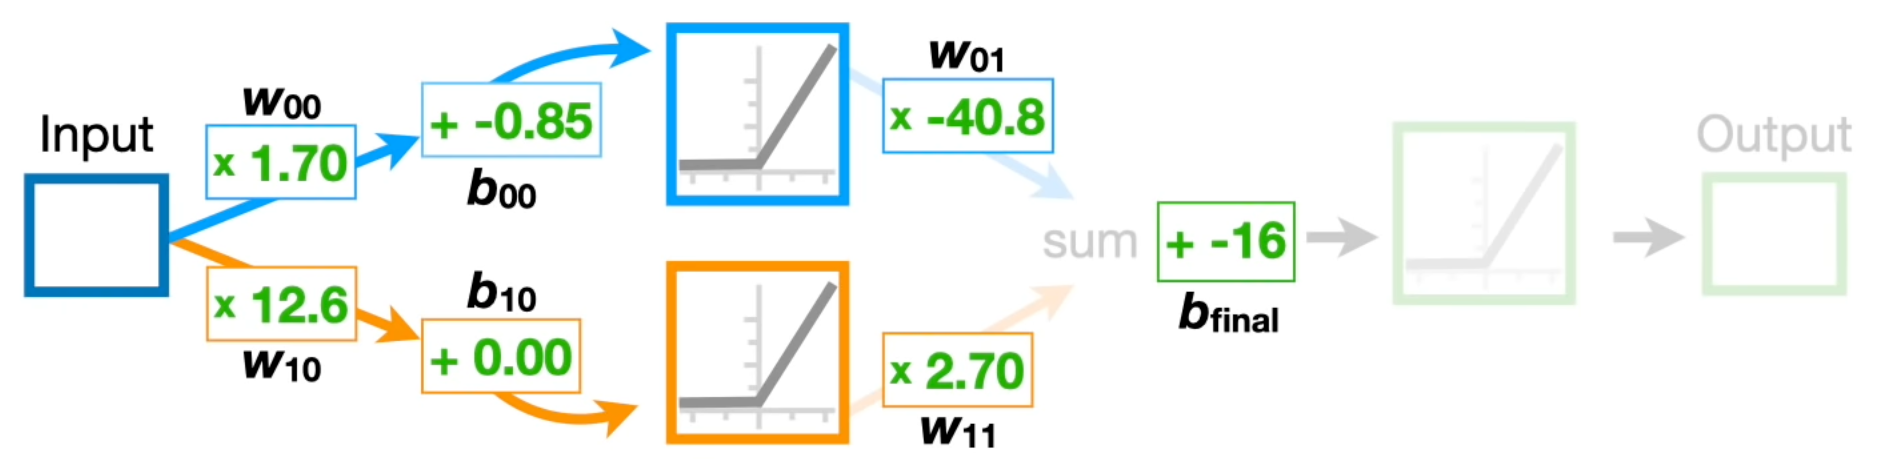
*Image from StatQuest YouTube Channel*

In [5]:
class BasicNN(nn.Module): # initialize a NN class inheriting from the nn.Module class
    def __init__(self):
        super().__init__() # initialize the parent class

        # initialize the weights and biases as parameters so that they can be optimized if we want
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False) # requires_grad set to false as we don't want to optimize this parameter
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    # define the forward pass of the network
    def forward(self, input): 
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output

## 3. Test the Neural Network

Text(0.5, 0, 'Dose')

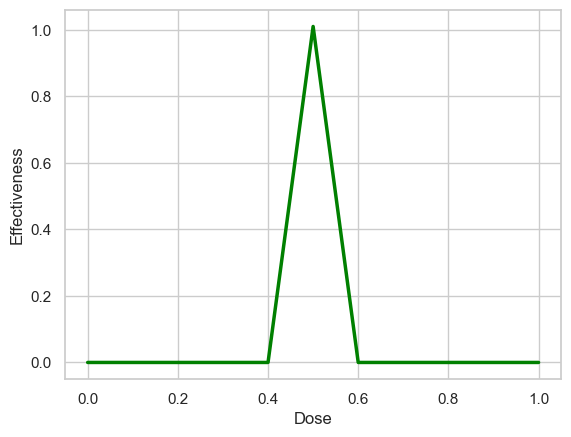

In [6]:
# Create test dataset
input_doses = torch.linspace(start=0, end=1, steps=11) # create a tensor of 11 equally spaced values between 0 and 1

# Create the model
model = BasicNN()

# Run prediction
output = model(input_doses)

# Plot the output
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output, color="green", linewidth=2.5)
plt.ylabel("Effectiveness")
plt.xlabel("Dose");

## 4. Optimize the Neural Network using Backpropagation

Set the final_bias value to 0 and use backpropagation to optimize the weights and biases of the neural network.

In [17]:
class BasicNN_train(nn.Module):  # initialize a NN class inheriting from the nn.Module class
    def __init__(self):
        super().__init__()  # initialize the parent class

        # initialize the weights and biases as parameters so that they can be optimized if we want
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)  
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True) # set requires_grad to True to optimize this parameter

    # define the forward pass of the network
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = (
            scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        )

        output = F.relu(input_to_final_relu)

        return output

Run inference on NN_train to verify it no longers provides the correct output.

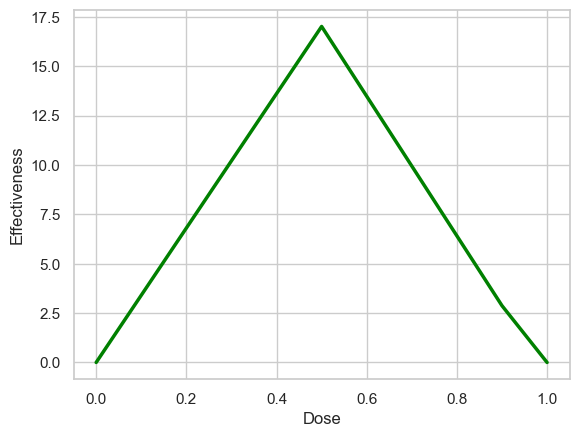

In [18]:
# Create dataset
input_doses = torch.linspace(start=0, end=1, steps=11)  # create a tensor of 11 equally spaced values between 0 and 1

# Create the model
model = BasicNN_train()

# Run prediction
output = model(input_doses)

# Plot the output
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output.detach(), color="green", linewidth=2.5) # output is detached to avoid tracking the gradient
plt.ylabel("Effectiveness")
plt.xlabel("Dose");

Create training data and run the training loop to optimize the weights and biases of the neural network.

In [19]:
# Create training data
inputs = torch.tensor([0, 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

# Define the optimizer
optimizer = SGD(model.parameters(), lr=0.1)
print(f"Final bias, before optimization: {model.final_bias.data}")

# Train the model
for epoch in range(100):
    
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i) ** 2 # squared residuals

        loss.backward() # backpropagate the gradient of the loss

        total_loss += float(loss) # SSR for the epoch

    if (total_loss < 0.0001):
        print(f"Converged at epoch {epoch}")
        break

    optimizer.step() # update the parameters
    optimizer.zero_grad() # zero the gradients stored in the model

    print(f"Step {epoch}, Final bias: {model.final_bias.data}, Loss: {total_loss}" + "\n")

print(f"Final bias, after optimization: {model.final_bias.data}")

Final bias, before optimization: 0.0
Step 0, Final bias: -3.202000141143799, Loss: 256.3200988769531

Step 1, Final bias: -5.7636003494262695, Loss: 164.0448760986328

Step 2, Final bias: -7.812880516052246, Loss: 104.98870849609375

Step 3, Final bias: -9.45230484008789, Loss: 67.1927719116211

Step 4, Final bias: -10.763843536376953, Loss: 43.00336837768555

Step 5, Final bias: -11.813075065612793, Loss: 27.522159576416016

Step 6, Final bias: -12.652460098266602, Loss: 17.614181518554688

Step 7, Final bias: -13.323967933654785, Loss: 11.273076057434082

Step 8, Final bias: -13.861174583435059, Loss: 7.21476936340332

Step 9, Final bias: -14.290939331054688, Loss: 4.6174516677856445

Step 10, Final bias: -14.634751319885254, Loss: 2.9551703929901123

Step 11, Final bias: -14.909801483154297, Loss: 1.8913096189498901

Step 12, Final bias: -15.129840850830078, Loss: 1.210437297821045

Step 13, Final bias: -15.305872917175293, Loss: 0.7746805548667908

Step 14, Final bias: -15.44669818

Test the trained model

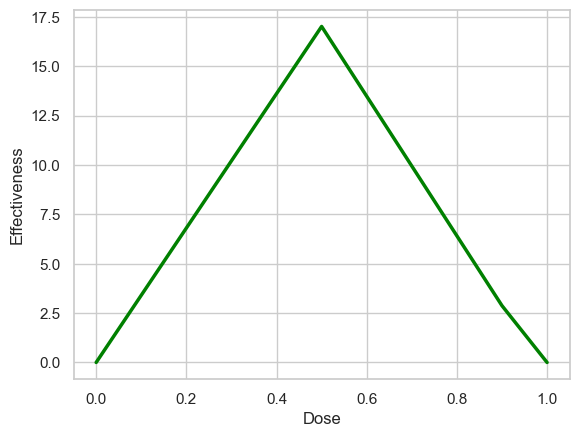

In [20]:
# Create dataset
input_doses = torch.linspace(start=0, end=1, steps=11)  # create a tensor of 11 equally spaced values between 0 and 1

# Run prediction
output = model(input_doses)

# Plot the output
sns.set(style="whitegrid")
sns.lineplot(x=input_doses, y=output.detach(), color="green", linewidth=2.5) # output is detached to avoid tracking the gradient
plt.ylabel("Effectiveness")
plt.xlabel("Dose");